# **이라크 데이터 파악**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/LikeLion/Final-Project/terror_finalver(plz).xlsx")

In [ ]:
df.shape

(173597, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173597 entries, 0 to 173596
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       173597 non-null  int64  
 1   eventid          173597 non-null  int64  
 2   iyear            173597 non-null  int64  
 3   imonth           173597 non-null  int64  
 4   iday             173597 non-null  int64  
 5   country_txt      173597 non-null  object 
 6   region_txt       173597 non-null  object 
 7   provstate        173597 non-null  object 
 8   latitude         173597 non-null  object 
 9   longitude        173597 non-null  object 
 10  city             173597 non-null  object 
 11  success          173597 non-null  int64  
 12  attacktype1_txt  173597 non-null  object 
 13  targtype1_txt    173597 non-null  object 
 14  weaptype1_txt    173597 non-null  object 
 15  nkill            173597 non-null  float64
 16  nwound           173597 non-null  int6

In [ ]:
df_1990 = df.copy()

In [ ]:
df_1990['total_victim'] = df_1990['nkill'] + df_1990['nwound']

In [ ]:
# 이름을 간략히 변경
df_1990['weaptype1_txt'] = df_1990['weaptype1_txt'].replace(
    'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
    'Vehicle'
)

In [ ]:
# 중복 제거 전 행 수 확인
print(f"중복 제거 전: {df_1990.shape[0]} rows")

# 'eventid'와 'Unnamed: 0' 제외한 컬럼 기준으로 중복 제거
df_1990 = df_1990.drop_duplicates(subset=[col for col in df_1990.columns if col not in ['eventid', 'Unnamed: 0']])

# 중복 제거 후 행 수 확인
print(f"중복 제거 후: {df_1990.shape[0]} rows")

# 'Unnamed: 0' 컬럼 삭제
df_1990.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

중복 제거 전: 173597 rows
중복 제거 후: 167685 rows


In [ ]:
# 이라크 데이터 추출
iraq_df = df_1990[df_1990["country_txt"] == "Iraq"]

In [ ]:
# 요일 파생변수 생성
iraq_df["date"] = pd.to_datetime(dict(year=iraq_df.iyear, month=iraq_df.imonth, day=iraq_df.iday), errors='coerce')
iraq_df["weekday"] = iraq_df["date"].dt.day_name()
iraq_df['weekday']

<ipython-input-11-434a2493c27f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iraq_df["date"] = pd.to_datetime(dict(year=iraq_df.iyear, month=iraq_df.imonth, day=iraq_df.iday), errors='coerce')
<ipython-input-11-434a2493c27f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iraq_df["weekday"] = iraq_df["date"].dt.day_name()


,weekday
5955,Wednesday
8478,Monday
8553,Monday
9590,Friday
9797,Wednesday
...,...
173533,Monday
173534,Monday
173569,Tuesday
173570,Tuesday


In [ ]:
# 데이터 결측치 확인
print(iraq_df.isnull().sum().sort_values(ascending=False))

weekday            18
date               18
imonth              0
iyear               0
eventid             0
country_txt         0
iday                0
region_txt          0
provstate           0
city                0
success             0
latitude            0
longitude           0
targtype1_txt       0
attacktype1_txt     0
weaptype1_txt       0
nkill               0
natlty1_txt         0
nwound              0
total_victim        0
gname               0
dtype: int64


In [ ]:
# 정확한 요일을 모르는 경우 0으로 표시 -> weekday를 표시할 수 없으므로 unknown으로 대체
display(iraq_df[iraq_df['weekday'].isna()])
iraq_df['weekday'] = iraq_df['weekday'].fillna('Unknown')

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,latitude,longitude,city,...,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,nwound,natlty1_txt,gname,total_victim,date,weekday
35693,200407120003,2004,7,0,Iraq,Middle East & North Africa,Al Anbar,33.420948,43.295662,Ramadi,...,Unknown,Military,Unknown,0.0,0,United States,Tawhid and Jihad,0.0,NaT,NaN
35785,200408010014,2004,7,0,Iraq,Middle East & North Africa,Nineveh,36.354145,43.14357,Mosul,...,Hostage Taking (Kidnapping),Business,Firearms,1.0,0,Turkey,Tawhid and Jihad,1.0,NaT,NaN
35825,200408130004,2004,8,0,Iraq,Middle East & North Africa,Unknown,Unknown,Unknown,Unknown,...,Hostage Taking (Kidnapping),Private Citizens & Property,Melee,1.0,0,Egypt,Tawhid and Jihad,1.0,NaT,NaN
36191,200412000001,2004,12,0,Iraq,Middle East & North Africa,Unknown,Unknown,Unknown,Unknown,...,Hostage Taking (Kidnapping),Business,Unknown,0.0,1,United States,Mujahedeen Army,1.0,NaT,NaN
38028,200510180003,2005,10,0,Iraq,Middle East & North Africa,Unknown,Unknown,Unknown,Unknown,...,Hostage Taking (Kidnapping),Private Citizens & Property,Firearms,1.0,0,Iraq,Al-Qaida in Iraq,1.0,NaT,NaN
38292,200601000010,2006,1,0,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Baghdad,...,Bombing/Explosion,Educational Institution,Explosives,0.0,21,Iraq,Unknown,21.0,NaT,NaN
38293,200601000011,2006,1,0,Iraq,Middle East & North Africa,At Tamim,35.45211,44.375465,Kirkuk,...,Armed Assault,Private Citizens & Property,Firearms,1.0,0,Iraq,Unknown,1.0,NaT,NaN
38294,200601000012,2006,1,0,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Baghdad,...,Armed Assault,Private Citizens & Property,Melee,3.0,0,Iraq,Unknown,3.0,NaT,NaN
38295,200601000013,2006,1,0,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Baghdad,...,Armed Assault,Private Citizens & Property,Firearms,11.0,0,Iraq,Unknown,11.0,NaT,NaN
39637,200605150001,2006,5,0,Iraq,Middle East & North Africa,Basra,30.510054,47.778095,Basra,...,Armed Assault,Police,Firearms,8.0,0,Iraq,Unknown,8.0,NaT,NaN


<ipython-input-13-8a6c31ac710e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iraq_df['weekday'] = iraq_df['weekday'].fillna('Unknown')


In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 33.0 MB/s eta 0:00:00


# **머신러닝 (분류형)**

## **인코딩+SMOTE(오버샘플링)+RF**

### **1. 피처(X), 타켓(y) 설정**
- Features : 무기 유형, 공격 유형, 타겟 대상 유형, 요일, 월, 행정 구역
- Target : 성공 여부


In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.9 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [76]:
# 피처+타겟
features = ['weaptype1_txt', 'attacktype1_txt', 'targtype1_txt', 'weekday', 'imonth', 'provstate']
target = 'success'

X = iraq_df[features].copy()
y = iraq_df[target]

In [77]:
X.value_counts()
y.value_counts()

,count
success,
1,23509
0,2681


### **2. 데이터 분할**

In [78]:
# 분할
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [79]:
print(y_train.value_counts())
print(y_test.value_counts())

success
1    16456
0     1877
Name: count, dtype: int64
success
1    7053
0     804
Name: count, dtype: int64


### **3. 피처 인코딩(Features Encoding)**
- One-Hot Encoding : weaptype1_txt, attacktype1_txt, targtype1_txt, weekday
- Ordinal Encoding : imonth
- Target Encoding : provstate

In [80]:
# 각 인코딩 대상 그룹 지정
onehot_cols = ['weaptype1_txt', 'attacktype1_txt', 'targtype1_txt', 'weekday']
ordinal_cols = ['imonth']
target_cols = ['provstate']

# One-Hot Encoding
X_train_onehot = pd.get_dummies(X_train[onehot_cols], drop_first=True)

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder()
X_train_ordinal = pd.DataFrame(
    ordinal_encoder.fit_transform(X_train[ordinal_cols]),
    columns=ordinal_cols,
    index=X_train.index
)

# Target Encoding (분할 후 적용)
target_encoder = TargetEncoder()
X_train_target = target_encoder.fit_transform(X_train[target_cols], y_train)

# 인코딩 합치기
X_train_encoded = pd.concat([X_train_onehot, X_train_ordinal, X_train_target], axis=1)

### **3. SMOTE 샘플링**

In [81]:
# SMOTE 오버샘플링
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_encoded, y_train)

In [82]:
# 클래스 분포 확인
print(y_res.value_counts())

success
1    16456
0    16456
Name: count, dtype: int64


### **4. Random Forest**

In [83]:
# 모델 학습
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_res, y_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [84]:
# 테스트 데이터 인코딩
X_test_onehot = pd.get_dummies(X_test[onehot_cols], drop_first=True)
X_test_ordinal = pd.DataFrame(
    ordinal_encoder.transform(X_test[ordinal_cols]),
    columns=ordinal_cols,
    index=X_test.index
)
X_test_target = target_encoder.transform(X_test[target_cols])

X_test_encoded = pd.concat([X_test_onehot, X_test_ordinal, X_test_target], axis=1)

# 컬럼 정렬 맞추기 (train 기준으로 재정렬, 없으면 0)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

### **5. 성능 평가**

Accuracy: 0.901

 Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.54      0.53       804
           1       0.95      0.94      0.94      7053

    accuracy                           0.90      7857
   macro avg       0.73      0.74      0.74      7857
weighted avg       0.90      0.90      0.90      7857



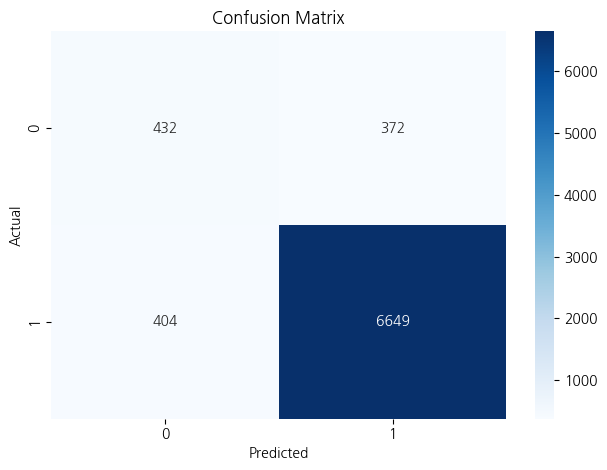

In [85]:
# 예측 & 성능 지표
y_pred = rf_model.predict(X_test_encoded)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# confusion matrix 출력
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

### **해석!**

**1. 성능 평가**

| 지표 | 클래스 0 (실패) | 클래스 1 (성공) | 설명 |
| --- | --- | --- | --- |
| **Precision** | 0.59 | 0.95 | 예측이 맞은 비율. 성공(1) 예측 시 정확도가 높음 |
| **Recall** | 0.56 | 0.96 | 실제 클래스 중 얼마나 맞췄는지. 성공(1)은 잘 포착함 |
| **F1-score** | 0.58 | 0.95 | Precision & Recall 균형. 성공(1) 쪽은 우수 |
| **Support** | 804 | 7053 | 테스트셋에 포함된 실제 샘플 수 |

<br>

**2. confusion matrix**

| 실제값↓ / 예측값→ | 예측: 실패 (0) | 예측: 성공 (1) |
| --- | --- | --- |
| **실제 실패(0)** | **454** (TN) | **350** (FP) |
| **실제 성공(1)** | **311** (FN) | **6742** (TP) |

- TP (True Positive): 실제 성공, 예측도 성공 → 6742건

- FP (False Positive): 실제 실패인데 성공으로 잘못 예측 → 350건
- FN (False Negative): 실제 성공인데 실패로 잘못 예측 → 311건
- TN (True Negative): 실제 실패, 예측도 실패 → 454건

<br>

**3. 전체 평가**
- 전체 Accuracy: 91.6% → 전체적으로 높은 정확도
- 성공(1) 클래스에 매우 강한 성능 (precision=0.95, recall=0.96)
- 실패(0) 클래스는 성능 낮음 (precision=0.59, recall=0.56) <br>

→ 즉, 실패 사례를 절반 이상 놓침 (FN: 311 / 7053 성공 중)


### **5-(2) 과적합 판단**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# 훈련 데이터 예측
y_train_pred = rf_model.predict(X_res)

# 훈련 성능
train_acc = accuracy_score(y_res, y_train_pred)
train_f1 = f1_score(y_res, y_train_pred)

# 테스트 성능 (이미 구한 것 재사용)
test_acc = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

# 결과 비교 출력
print(f"Train Accuracy: {train_acc:.3f}, F1: {train_f1:.3f}")
print(f"Test  Accuracy: {test_acc:.3f}, F1: {test_f1:.3f}")

gap = train_acc - test_acc
print(f"\n 📍Accuracy Gap: {gap:.3f}")
if gap > 0.1:
    print("과적합 가능성 높음")
else:
    print("과적합 심하지 않음")

Train Accuracy: 0.976, F1: 0.976
Test  Accuracy: 0.901, F1: 0.945

 📍Accuracy Gap: 0.075
과적합 심하지 않음


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 모델 정의
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# 탐색할 하이퍼파라미터
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
}

# GridSearchCV 정의 (f1_macro 기준)
grid = GridSearchCV(
    rf,
    param_grid,
    scoring='f1_macro',  # 핵심 포인트 ✅
    cv=5,
    n_jobs=-1,
    verbose=1
)

# SMOTE 적용된 데이터로 학습
grid.fit(X_res, y_res)

# 최적 모델
best_rf = grid.best_estimator_
print("📌 Best Params:", grid.best_params_)

# 평가
from sklearn.metrics import classification_report
y_pred_best = best_rf.predict(X_test_encoded)
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
📌 Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.52      0.53      0.53       804
           1       0.95      0.94      0.95      7053

    accuracy                           0.90      7857
   macro avg       0.74      0.74      0.74      7857
weighted avg       0.90      0.90      0.90      7857



### **5-(3) AUC-ROC curve**

AUC-ROC Score: 0.8326


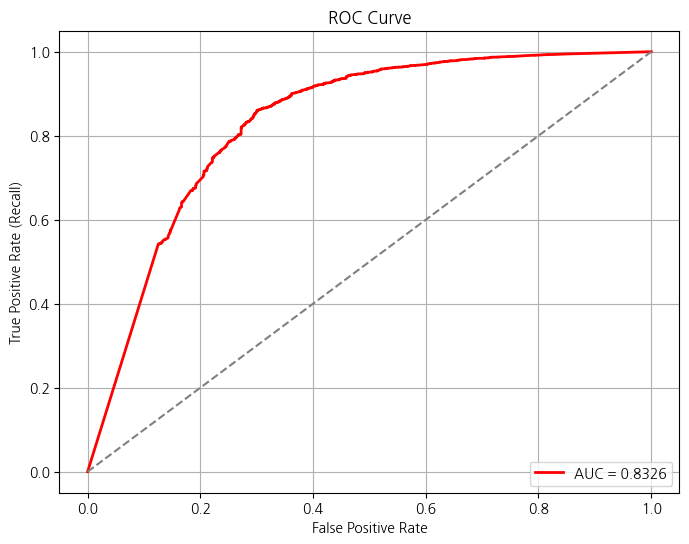

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 예측 확률값 (positive class = 1에 대한 확률)
y_prob = rf_model.predict_proba(X_test_encoded)[:, 1]

# ROC Curve 데이터
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC 계산
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC Score: {auc_score:.4f}")

# 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}", color='red', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### 해석!
1.
- X축: False Positive Rate (FPR)	거짓 양성 비율 → 실제 0인데 1로 예측한 비율
- Y축: True Positive Rate (TPR, 재현율)	실제 1 중에서 1로 맞춘 비율 (Recall)
- 곡선	다양한 Threshold에서의 TPR과 FPR 조합
- 회색 점선	무작위(Random) 모델 기준선 (AUC = 0.5)
- 빨간 곡선	현재 모델의 성능 (위로 휘어질수록 좋음)
- AUC (Area Under Curve)	전체 성능 요약 지표 (1.0에 가까울수록 좋음)

2.AUC = 0.8326 해석
- 이 값은 **임의로 0과 1을 골랐을 때, 모델이 정답(1)을 더 높은 확률로 예측할 확률이 83.3%**임을 의미

### **5-(4) PR curve**

Average Precision Score: 0.9681


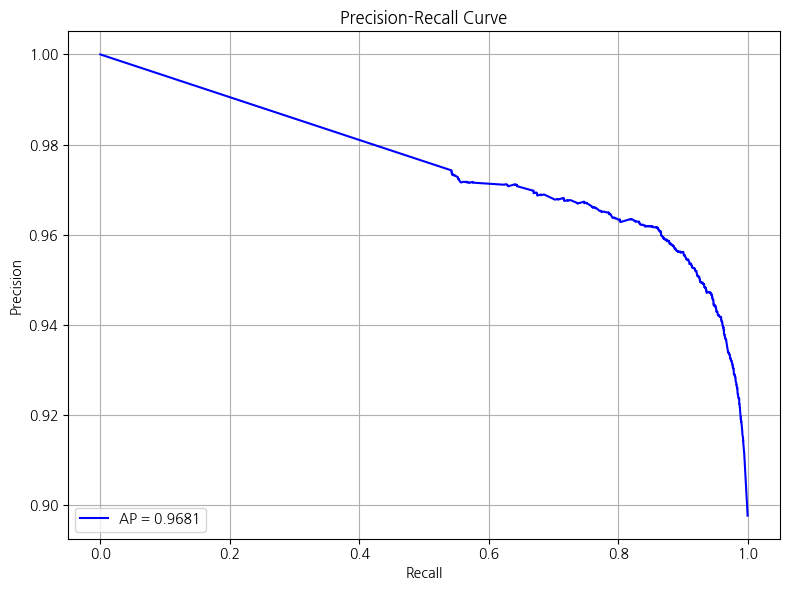

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 예측 확률 (success=1에 대한 확률)
y_prob = rf_model.predict_proba(X_test_encoded)[:, 1]

# PR Curve 계산
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# 평균 정밀도 (AUC 개념과 유사)
avg_precision = average_precision_score(y_test, y_prob)
print(f"Average Precision Score: {avg_precision:.4f}")

# 시각화
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f"AP = {avg_precision:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()


### 해석!

- X축: Recall (재현율)	실제 양성 중 예측으로 맞춘 비율 = TP / (TP + FN)
- Y축: Precision (정밀도)	예측을 양성으로 한 것 중 실제 양성인 비율 = TP / (TP + FP)
- 곡선	다양한 threshold에서의 정밀도와 재현율의 trade-off
- AP = 0.9681	Average Precision: PR 곡선 아래 면적 (1에 가까울수록 좋음)
- 그래프가 오른쪽 위로 휘어져 있을수록 좋은 모델입니다.

### **6. 피처 중요도**
1. 개별 인코딩된 변수 단위
2. 데이터에서 제공하는 원래 피처 단위

<ipython-input-86-8805744a9b93>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_features, y='feature', x='importance', palette='crest')


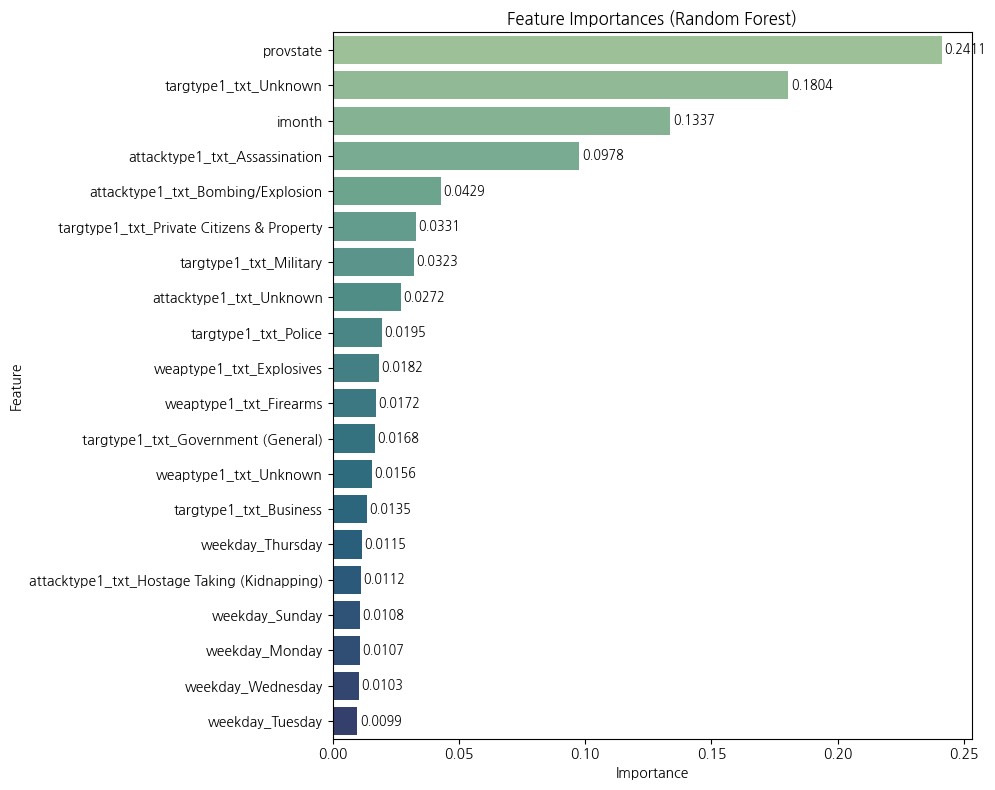

In [86]:
# 피처 중요도 추출
importances = rf_model.feature_importances_
feature_names = X_train_encoded.columns

# 정렬
feat_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 상위 N개
top_n = 20
top_features = feat_df.head(top_n)

# 시각화
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=top_features, y='feature', x='importance', palette='crest')

# 수치 표시
for i, (imp, feature) in enumerate(zip(top_features['importance'], top_features['feature'])):
    plt.text(imp + 0.001, i, f"{imp:.4f}", va='center', fontsize=9)

plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### **해석!**

1.
- provstate: 테러 발생 구역 자체가 예측에 가장 큰 영향을 줌 (위치 기반 위험도)
- iyear: 발생 연도 자체도 예측에 중요한 변수임 (시간 흐름에 따른 변화 감지됨)
- attacktype1_txt_Assassination: 특정 공격 유형(암살)의 여부가 성공률과 연관 깊음


2.   
- 위치 관련 변수 (provstate): 성공률에 큰 영향 → 이라크 내 특정 구역에서 성공률이 더 높거나 낮은 패턴이 있음
- 공격 유형 (attacktype1_txt_*): 특정 유형(예: 암살, 폭탄 등)의 영향이 뚜렷
- 타겟 유형 (targtype1_txt_*): 민간/정부/미상 등 타겟 성격에 따라 성공률 예측에 큰 영향
- 시간 정보 (imonth, weekday): 시간 흐름이나 요일도 영향을 주지만 상대적으로 덜 중요

3. 실제 적용 시사점
- 특정 구역(provstate)의 영향력 큼: 지역 기반 테러 대응 정책 우선순위 설정
- 공격 유형/타겟 유형의 영향: 특정 유형 대응책 강화 필요
- 시간 정보(연도, 월, 요일)도 영향: 시계열 기반 패턴 감지 가능 → 경계 강화 타이밍 예측


In [89]:
total_importance = feat_df['importance'].sum()

grouped_series = pd.Series({
    group: feat_df.loc[feat_df['feature'].isin(cols), 'importance'].sum() / total_importance * 100
    for group, cols in feature_groups.items()
}).sort_values(ascending=False).round(2)

<ipython-input-90-14e641276012>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=grouped_series.values, y=grouped_series.index, palette='crest')


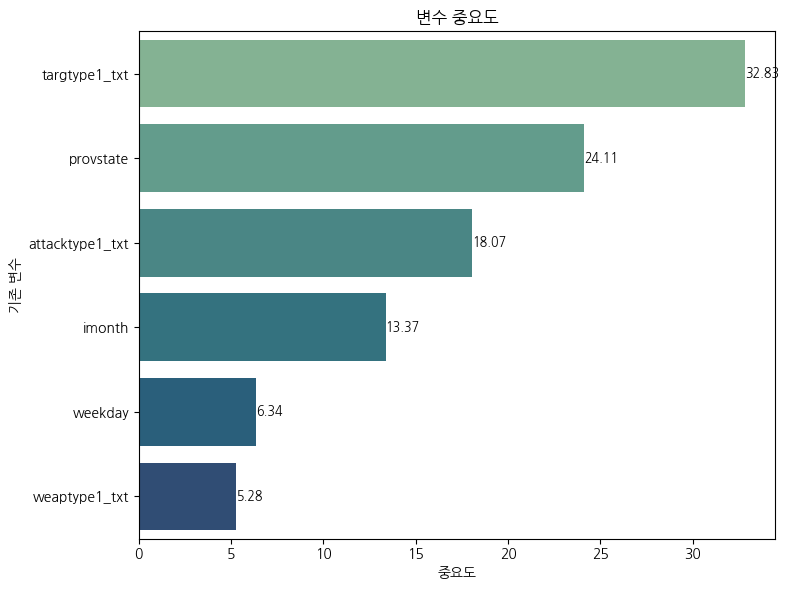

In [90]:
# 원래 피처 그룹 정의 (column 이름에 해당 키워드 포함되는 걸 기준으로)
feature_groups = {
    'weaptype1_txt': [],
    'attacktype1_txt': [],
    'targtype1_txt': [],
    'weekday': [],
    'imonth': [],
    'provstate': [],
}

# 각 인코딩된 컬럼이 어떤 원래 피처에 해당하는지 분류
for col in X_train_encoded.columns:
    for key in feature_groups:
        if col.startswith(key):
            feature_groups[key].append(col)
            break

# 중요도 합산 결과 저장
grouped_importance = {}

for group, cols in feature_groups.items():
    total = feat_df.loc[feat_df['feature'].isin(cols), 'importance'].sum()
    grouped_importance[group] = total

# 시리즈로 변환 및 정렬
total_importance = feat_df['importance'].sum()

grouped_series = pd.Series({
    group: feat_df.loc[feat_df['feature'].isin(cols), 'importance'].sum() / total_importance * 100
    for group, cols in feature_groups.items()
}).sort_values(ascending=False).round(2)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=grouped_series.values, y=grouped_series.index, palette='crest')

# 수치 표시
for i, (value, label) in enumerate(zip(grouped_series.values, grouped_series.index)):
    plt.text(value + 0.002, i, f"{value}", va='center', fontsize=9)

plt.title("변수 중요도")
plt.xlabel("중요도")
plt.ylabel("기존 변수")
plt.tight_layout()
plt.show()


## **인코딩+SMOTE(오버샘플링)+XGBoost**

In [ ]:
# 피처+타겟
features = ['weaptype1_txt', 'attacktype1_txt', 'targtype1_txt', 'weekday', 'imonth', 'provstate']
target = 'success'

X = iraq_df[features].copy()
y = iraq_df[target]

In [ ]:
X.value_counts()
y.value_counts()

,count
success,
1,23509
0,2681


In [ ]:
# 분할
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

success
1    16456
0     1877
Name: count, dtype: int64
success
1    7053
0     804
Name: count, dtype: int64


In [ ]:
# 각 인코딩 대상 그룹 지정
onehot_cols = ['weaptype1_txt', 'attacktype1_txt', 'targtype1_txt', 'weekday']
ordinal_cols = ['imonth']
target_cols = ['provstate']

# One-Hot Encoding
X_train_onehot = pd.get_dummies(X_train[onehot_cols], drop_first=True)

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder()
X_train_ordinal = pd.DataFrame(
    ordinal_encoder.fit_transform(X_train[ordinal_cols]),
    columns=ordinal_cols,
    index=X_train.index
)

# Target Encoding (분할 후 적용)
target_encoder = TargetEncoder()
X_train_target = target_encoder.fit_transform(X_train[target_cols], y_train)

# 인코딩 합치기
X_train_encoded = pd.concat([X_train_onehot, X_train_ordinal, X_train_target], axis=1)

In [ ]:
# SMOTE 오버샘플링
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_encoded, y_train)

In [ ]:
# 클래스 분포 확인
print(y_res.value_counts())

success
1    16456
0    16456
Name: count, dtype: int64


### **XGBoost**

In [ ]:
# 모델 학습
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

xgb_model = XGBClassifier(random_state=42,
                          eval_metric='logloss')   # 이진 분류에 적합한 로그손실 사용

xgb_model.fit(X_res, y_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# 테스트 데이터 인코딩
X_test_onehot = pd.get_dummies(X_test[onehot_cols], drop_first=True)
X_test_ordinal = pd.DataFrame(
    ordinal_encoder.transform(X_test[ordinal_cols]),
    columns=ordinal_cols,
    index=X_test.index
)
X_test_target = target_encoder.transform(X_test[target_cols])

X_test_encoded = pd.concat([X_test_onehot, X_test_ordinal, X_test_target], axis=1)

# 컬럼 정렬 맞추기 (train 기준으로 재정렬, 없으면 0)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

Accuracy: 0.908

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.54      0.55       804
           1       0.95      0.95      0.95      7053

    accuracy                           0.91      7857
   macro avg       0.75      0.75      0.75      7857
weighted avg       0.91      0.91      0.91      7857



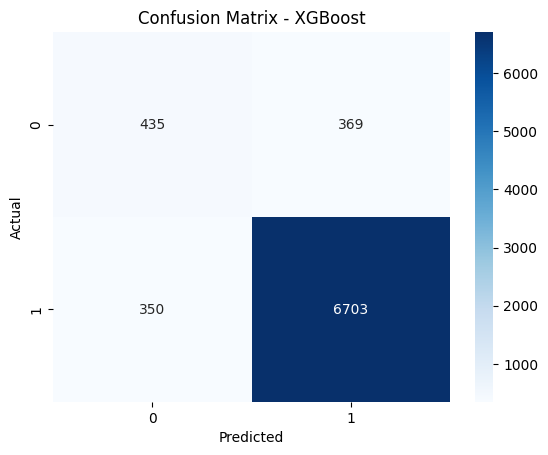

In [ ]:
# 예측 & 성능 지표
y_pred_xgb = xgb_model.predict(X_test_encoded)

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# confusion matrix 출력
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

### **과적합 판단**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# 훈련 데이터 예측
y_train_pred_xgb = xgb_model.predict(X_res)
train_acc_xgb = accuracy_score(y_res, y_train_pred_xgb)
train_f1_xgb = f1_score(y_res, y_train_pred_xgb)

# 테스트 데이터 예측
y_test_pred_xgb = xgb_model.predict(X_test_encoded)
test_acc_xgb = accuracy_score(y_test, y_test_pred_xgb)
test_f1_xgb = f1_score(y_test, y_test_pred_xgb)

# 출력
print(f"XGB Train Accuracy: {train_acc_xgb:.3f}, F1: {train_f1_xgb:.3f}")
print(f"XGB Test  Accuracy: {test_acc_xgb:.3f}, F1: {test_f1_xgb:.3f}")
print(f"\n 📍Accuracy Gap: {gap:.3f}")
if gap > 0.1:
    print("과적합 가능성 높음")
else:
    print("과적합 심하지 않음")

XGB Train Accuracy: 0.948, F1: 0.949
XGB Test  Accuracy: 0.908, F1: 0.949

 📍Accuracy Gap: 0.075
과적합 심하지 않음


### **AUC-ROC curve**

AUC-ROC Score: 0.8605


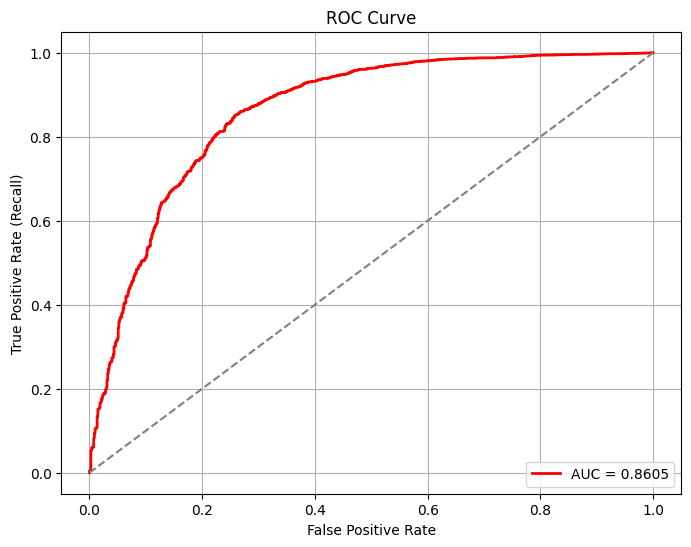

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 예측 확률값 (positive class = 1에 대한 확률)
y_prob_xgb = xgb_model.predict_proba(X_test_encoded)[:, 1]

# ROC Curve 데이터
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)

# AUC 계산
auc_score = roc_auc_score(y_test, y_prob_xgb)
print(f"AUC-ROC Score: {auc_score:.4f}")

# 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}", color='red', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## **인코딩+SMOTE(오버샘플링)+LogisticRegression**

In [ ]:
# 피처+타겟
features = ['weaptype1_txt', 'attacktype1_txt', 'targtype1_txt', 'weekday', 'imonth', 'provstate']
target = 'success'

X = iraq_df[features].copy()
y = iraq_df[target]

In [ ]:
X.value_counts()
y.value_counts()

,count
success,
1,23509
0,2681


In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [ ]:
# 각 인코딩 대상 그룹 지정
onehot_cols = ['weaptype1_txt', 'attacktype1_txt', 'targtype1_txt', 'weekday']
ordinal_cols = ['imonth']
target_cols = ['provstate']

# One-Hot Encoding
X_train_onehot = pd.get_dummies(X_train[onehot_cols], drop_first=True)

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder()
X_train_ordinal = pd.DataFrame(
    ordinal_encoder.fit_transform(X_train[ordinal_cols]),
    columns=ordinal_cols,
    index=X_train.index
)

# Target Encoding (분할 후 적용)
target_encoder = TargetEncoder()
X_train_target = target_encoder.fit_transform(X_train[target_cols], y_train)

# 인코딩 합치기
X_train_encoded = pd.concat([X_train_onehot, X_train_ordinal, X_train_target], axis=1)

In [ ]:
# SMOTE 오버샘플링
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_encoded, y_train)

In [ ]:
# 클래스 분포 확인
print(y_res.value_counts())

success
1    16456
0    16456
Name: count, dtype: int64


### **LogisticRegression**

[Logistic Regression 결과]
Accuracy: 0.868
              precision    recall  f1-score   support

           0       0.41      0.68      0.51       804
           1       0.96      0.89      0.92      7053

    accuracy                           0.87      7857
   macro avg       0.69      0.79      0.72      7857
weighted avg       0.90      0.87      0.88      7857



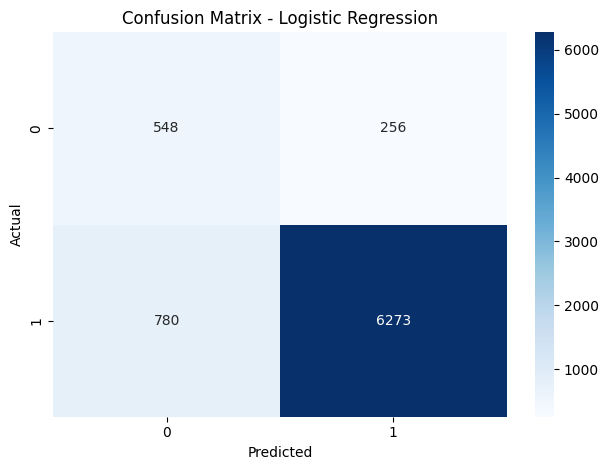

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 모델 정의
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# 학습
lr_model.fit(X_res, y_res)

# 테스트 데이터 인코딩
X_test_onehot = pd.get_dummies(X_test[onehot_cols], drop_first=True)
X_test_ordinal = pd.DataFrame(
    ordinal_encoder.transform(X_test[ordinal_cols]),
    columns=ordinal_cols,
    index=X_test.index
)
X_test_target = target_encoder.transform(X_test[target_cols])

X_test_encoded = pd.concat([X_test_onehot, X_test_ordinal, X_test_target], axis=1)

# 컬럼 정렬 맞추기 (train 기준으로 재정렬, 없으면 0)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# 예측
y_pred_lr = lr_model.predict(X_test_encoded)

# 평가
print("[Logistic Regression 결과]")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")
print(classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


### **과적합 판단**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# 훈련 데이터 예측
y_train_pred_lr = lr_model.predict(X_res)

# 훈련 성능
train_acc = accuracy_score(y_res, y_train_pred_lr)
train_f1 = f1_score(y_res, y_train_pred_lr)

# 테스트 성능
test_acc = accuracy_score(y_test, y_pred_lr)
test_f1 = f1_score(y_test, y_pred_lr)

# 출력
print(f"Train Accuracy: {train_acc:.3f}, F1: {train_f1:.3f}")
print(f"Test  Accuracy: {test_acc:.3f}, F1: {test_f1:.3f}")

# 과적합 판단
gap = train_acc - test_acc
print(f"\n📍 Accuracy Gap: {gap:.3f}")
if gap > 0.1:
    print("과적합 가능성 높음")
else:
    print("과적합 심하지 않음")


Train Accuracy: 0.870, F1: 0.874
Test  Accuracy: 0.868, F1: 0.924

📍 Accuracy Gap: 0.002
과적합 심하지 않음


## **인코딩+SMOTE(오버샘플링)+LightGBM**

In [ ]:
# 피처+타겟
features = ['weaptype1_txt', 'attacktype1_txt', 'targtype1_txt', 'weekday', 'imonth', 'provstate']
target = 'success'

X = iraq_df[features].copy()
y = iraq_df[target]

In [ ]:
X.value_counts()
y.value_counts()

,count
success,
1,23509
0,2681


In [ ]:
# 분할
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

success
1    16456
0     1877
Name: count, dtype: int64
success
1    7053
0     804
Name: count, dtype: int64


In [ ]:
# 각 인코딩 대상 그룹 지정
onehot_cols = ['weaptype1_txt', 'attacktype1_txt', 'targtype1_txt', 'weekday']
ordinal_cols = ['imonth']
target_cols = ['provstate']

# One-Hot Encoding
X_train_onehot = pd.get_dummies(X_train[onehot_cols], drop_first=True)

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder()
X_train_ordinal = pd.DataFrame(
    ordinal_encoder.fit_transform(X_train[ordinal_cols]),
    columns=ordinal_cols,
    index=X_train.index
)

# Target Encoding (분할 후 적용)
target_encoder = TargetEncoder()
X_train_target = target_encoder.fit_transform(X_train[target_cols], y_train)

# 인코딩 합치기
X_train_encoded = pd.concat([X_train_onehot, X_train_ordinal, X_train_target], axis=1)

In [ ]:
# SMOTE 오버샘플링
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_encoded, y_train)

In [ ]:
# 클래스 분포 확인
print(y_res.value_counts())

success
1    16456
0    16456
Name: count, dtype: int64


### **LightGBM**

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Number of positive: 16456, number of negative: 16456
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 32912, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM 결과]
Accuracy: 0.912
              precision    r

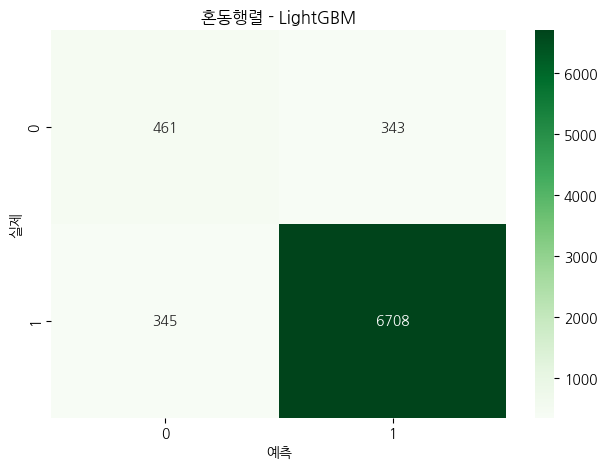

In [ ]:
from lightgbm import LGBMClassifier

# 모델 정의
lgbm_model = LGBMClassifier(
    class_weight='balanced',
    max_depth=10,                     # 더 깊게
    min_data_in_leaf=5,              # 리프당 최소 샘플 수
    learning_rate=0.05,
    n_estimators=300,
    random_state=42
)


# 학습
lgbm_model.fit(X_res, y_res)

# 테스트 데이터 인코딩
X_test_onehot = pd.get_dummies(X_test[onehot_cols], drop_first=True)
X_test_ordinal = pd.DataFrame(
    ordinal_encoder.transform(X_test[ordinal_cols]),
    columns=ordinal_cols,
    index=X_test.index
)
X_test_target = target_encoder.transform(X_test[target_cols])

X_test_encoded = pd.concat([X_test_onehot, X_test_ordinal, X_test_target], axis=1)

# 컬럼 정렬 맞추기 (train 기준으로 재정렬, 없으면 0)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# 예측
y_pred_lgbm = lgbm_model.predict(X_test_encoded)

# 평가
print("[LightGBM 결과]")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgbm):.3f}")
print(classification_report(y_test, y_pred_lgbm))

cm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("혼동행렬 - LightGBM")
plt.xlabel("예측")
plt.ylabel("실제")
plt.tight_layout()
plt.show()


### **과적합 판단**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# 훈련 데이터 예측
y_train_pred_lgbm = lgbm_model.predict(X_res)

# 훈련 성능
train_acc_lgbm = accuracy_score(y_res, y_train_pred_lgbm)
train_f1_lgbm = f1_score(y_res, y_train_pred_lgbm)

# 테스트 성능 (이미 예측한 y_pred_lgbm 사용)
test_acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
test_f1_lgbm = f1_score(y_test, y_pred_lgbm)

# 결과 출력
print("[LightGBM 과적합 진단]")
print(f"Train Accuracy: {train_acc_lgbm:.3f}, F1: {train_f1_lgbm:.3f}")
print(f"Test  Accuracy: {test_acc_lgbm:.3f}, F1: {test_f1_lgbm:.3f}")

gap = train_acc_lgbm - test_acc_lgbm
print(f"\n📍 Accuracy Gap: {gap:.3f}")
if gap > 0.1:
    print("과적합 가능성 높음")
else:
    print("과적합 심하지 않음")


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM 과적합 진단]
Train Accuracy: 0.948, F1: 0.948
Test  Accuracy: 0.912, F1: 0.951

📍 Accuracy Gap: 0.035
과적합 심하지 않음


### **AUC_ROC curve**

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
AUC-ROC Score: 0.8685


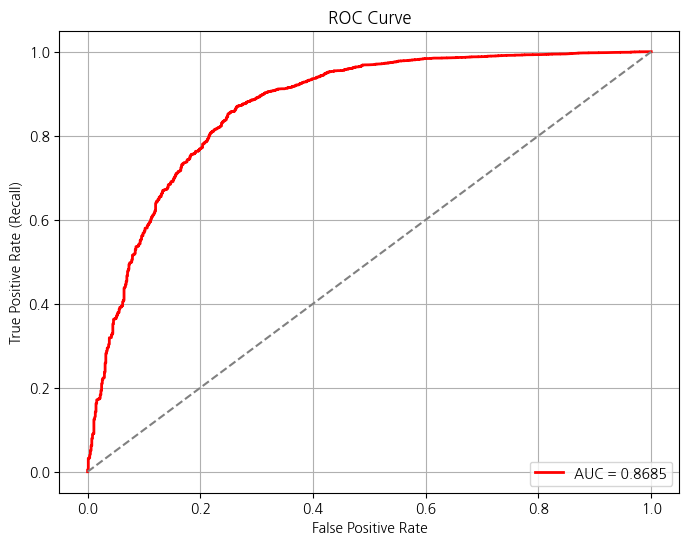

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 예측 확률값 (positive class = 1에 대한 확률)
y_prob_lgbm = lgbm_model.predict_proba(X_test_encoded)[:, 1]

# ROC Curve 데이터
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lgbm)

# AUC 계산
auc_score = roc_auc_score(y_test, y_prob_lgbm)
print(f"AUC-ROC Score: {auc_score:.4f}")

# 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}", color='red', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### **피처 중요도**

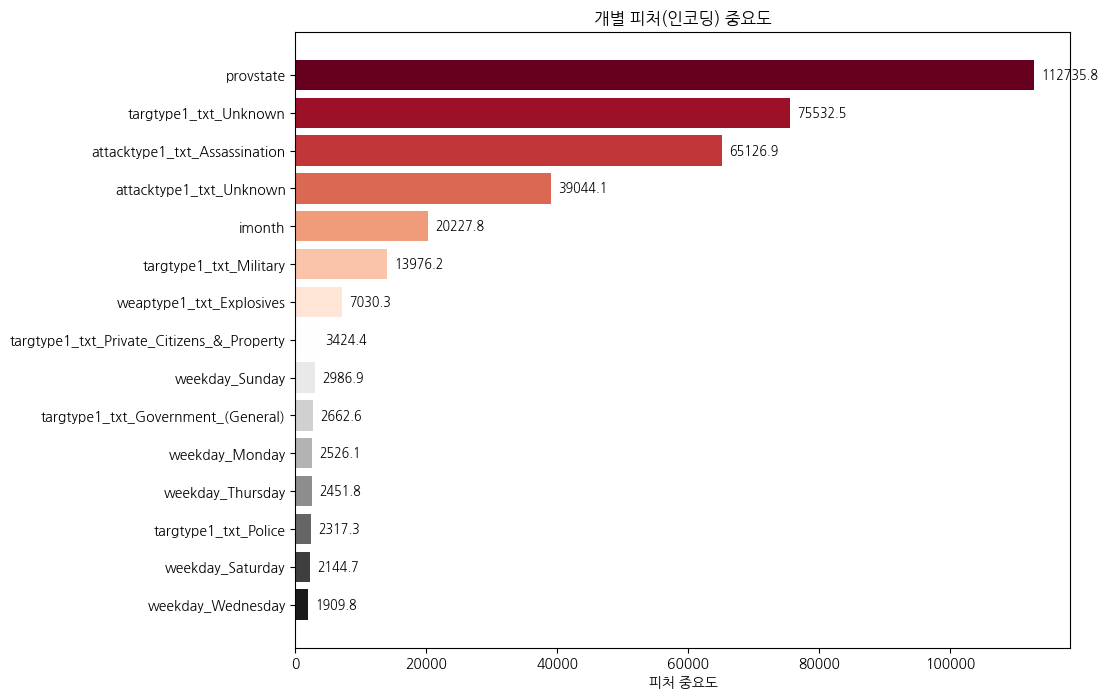

In [ ]:
import matplotlib.cm as cm
import numpy as np

# 중요도 추출
gain_importances = lgbm_model.booster_.feature_importance(importance_type='gain')
feature_names = lgbm_model.booster_.feature_name()

# 데이터프레임 추출
importance_gain_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": gain_importances
}).sort_values(by="Importance", ascending=False)

# 시각화 (Top 20)
top_n = 15
top_features = importance_gain_df.iloc[:top_n][::-1]

colors = cm.RdGy(np.linspace(1,0, top_n))
plt.figure(figsize=(10, 8))
bars = plt.barh(top_features["Feature"], top_features["Importance"], color=colors)
plt.xlabel("피처 중요도")
plt.title("개별 피처(인코딩) 중요도")

# 수치 표시
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(gain_importances) * 0.01, bar.get_y() + bar.get_height() / 2,
             f"{width:.1f}", va='center', fontsize=9)
plt.show()

### 해석!

1.  
- LightGBM의 피처 중요도 분석 결과, 테러 성공 여부에 가장 큰 영향을 주는 변수는 지역(Provstate)으로 나타났다.
- 이는 특정 지역(예: 바그다드 등)에서 테러 성공률이 매우 높거나 낮은 경향이 존재할 수 있음을 시사한다.

2.
- 그 외에도 '공격 유형' 및 '타겟 대상'이 중요한 변수로 나타났으며, 특히 '암살(Assassination)' 및 '타겟이 알려지지 않은 경우(Unknown)'가 모델의 결정에 큰 영향을 미쳤다.

3.
- '월(month)'과 '요일(weekday)'도 일부 영향력을 갖고 있으나, 공격 및 대상 유형, 지역 변수에 비해 상대적으로 덜 중요했다.

4.
- 따라서 향후 정책적 대응이나 위험 예측 모델에서는 **지역별 위험도 가중치**, **공격 방식 및 대상에 따른 성공률 분석**이 중요하게 고려되어야 함.


In [ ]:
# 피처 중요도 추출
importances = lgbm_model.feature_importances_
feature_names = X_train_encoded.columns

# 정렬
feat_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

<ipython-input-67-808a54901d23>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=grouped_series.values, y=grouped_series.index, palette='crest')


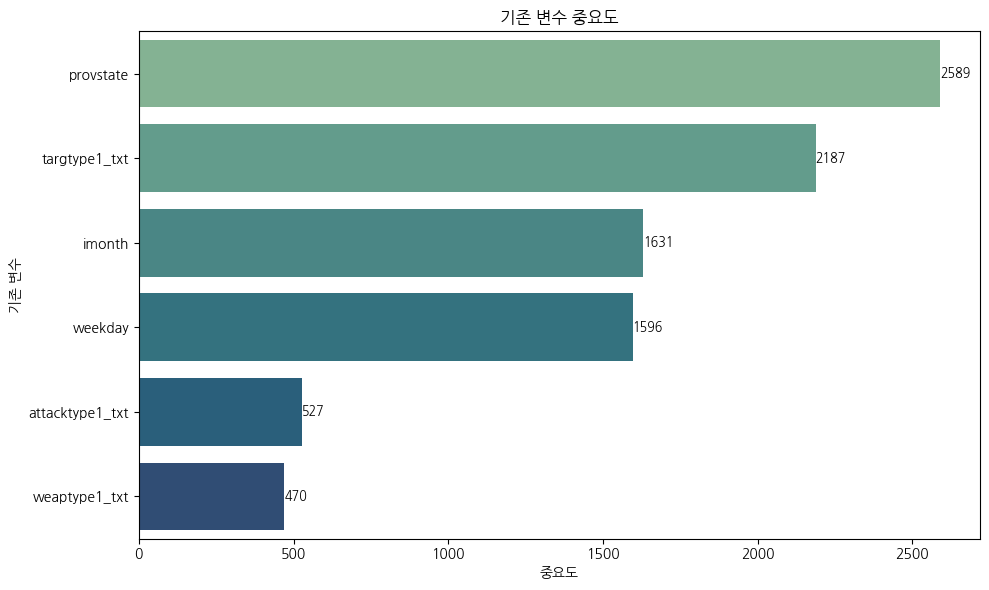

In [ ]:
# 원래 피처 그룹 정의 (column 이름에 해당 키워드 포함되는 걸 기준으로)
feature_groups = {
    'weaptype1_txt': [],
    'attacktype1_txt': [],
    'targtype1_txt': [],
    'weekday': [],
    'imonth': [],
    'provstate': [],
}

# 각 인코딩된 컬럼이 어떤 원래 피처에 해당하는지 분류
for col in X_train_encoded.columns:
    for key in feature_groups:
        if col.startswith(key):
            feature_groups[key].append(col)
            break

# 중요도 합산 결과 저장
grouped_importance = {}

for group, cols in feature_groups.items():
    total = feat_df.loc[feat_df['feature'].isin(cols), 'importance'].sum()
    grouped_importance[group] = total

# 시리즈로 변환 및 정렬
grouped_series = pd.Series(grouped_importance).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=grouped_series.values, y=grouped_series.index, palette='crest')

# 수치 표시
for i, (value, label) in enumerate(zip(grouped_series.values, grouped_series.index)):
    plt.text(value + 0.002, i, f"{value:.0f}", va='center', fontsize=9)

plt.title("기존 변수 중요도")
plt.xlabel("중요도")
plt.ylabel("기존 변수")
plt.tight_layout()
plt.show()


### **Shap**

In [ ]:
import shap

# 그냥 기본 옵션으로 explainer 생성 (LightGBM은 자동 인식됨)
explainer = shap.TreeExplainer(lgbm_model)

# 전체 테스트셋 SHAP 값 계산
shap_values = explainer.shap_values(X_test_encoded)

# 결과 확인
print(f"type: {type(shap_values)}")
print(f"shape: {np.array(shap_values).shape}")


type: <class 'numpy.ndarray'>
shape: (7857, 45)


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


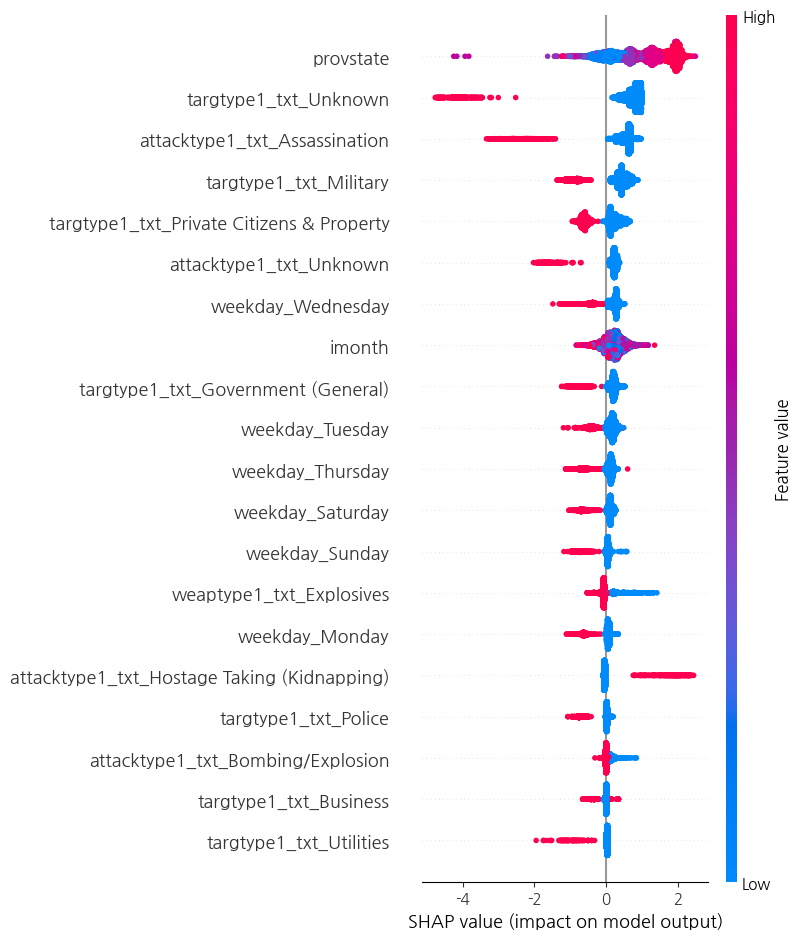

In [ ]:
# 이진 분류면 shap_values[1] 사용 (class=1)
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap.summary_plot(shap_values[1], X_test_encoded)
else:
    shap.summary_plot(shap_values, X_test_encoded)


### **해석!**

1. SHAP summary plot 구조 설명
- x축 (SHAP value): 각 feature 값이 예측값(success 확률)에 얼마나 영향을 주었는지를 나타냅니다.
- 양수 (+) → 테러가 성공할 가능성을 높이는 방향으로 영향을 준 feature 값.
- 음수 (-) → 테러가 실패할 가능성을 높이는 방향으로 영향을 준 feature 값.
- 색상: 해당 feature의 값 크기를 의미함.
- 빨간색: feature 값이 높음 (또는 해당 범주가 있음).
- 파란색: feature 값이 낮음 (또는 해당 범주가 없음).
- 각 줄 (feature): 해당 feature가 모델에 얼마나 큰 영향을 주는지를 의미.
- 위에 있을수록 모델 예측에 영향을 더 많이 미친 feature.

<br>

2. 주요 Feature 해석
- provstate
  - 가장 중요한 변수임.
  - SHAP 분포가 우측으로 치우쳐 있음 → 특정 지역은 성공 확률을 높이는 쪽으로 강하게 작용함.
  - 색깔이 짙은 분홍 → 특정 지역들이 모델에서 테러 성공률을 높이는 쪽으로 작용.

- targtype1_txt_Unknown
  - SHAP 값이 음수로 몰림 → ‘타겟이 Unknown인 경우’는 성공 확률을 낮추는 경향이 있음.
  - 해석: 타겟이 명확하지 않은 경우, 테러가 성공하지 못했을 가능성이 높음.
  - 모델 입장에서는 이런 "정보 없음"이 오히려 테러 실패와 연관된 경우가 많았기 때문에, 음의 SHAP 값을 갖는다.

- attacktype1_txt_Assassination
  - 대부분 양의 SHAP 값을 가짐 → 암살은 성공 확률을 높이는 경향이 있음.
  - 빨간색으로 퍼짐 → 암살이라는 공격 방식이 있으면 성공률을 높임.

- attacktype1_txt_Unknown
  - SHAP 값이 음수 → 공격 방식이 불명확한 경우 성공 확률이 낮아짐.



### **eli5**

In [ ]:
!pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 9.4 MB/s eta 0:00:00


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

# LightGBM 모델은 바로 사용 가능
eli5.show_weights(lgbm_model, feature_names=X_test_encoded.columns.tolist())

Weight,Feature
0.3057,provstate
0.2048,targtype1_txt_Unknown
0.1766,attacktype1_txt_Assassination
0.1059,attacktype1_txt_Unknown
0.0549,imonth
0.0379,targtype1_txt_Military
0.0191,weaptype1_txt_Explosives
0.0093,targtype1_txt_Private Citizens & Property
0.0081,weekday_Sunday
0.0072,targtype1_txt_Government (General)


### **해석!**
- 모델 내부 중요도 (Built-in Feature Importance)
  - Weight 값 : 트리가 학습 과정에서 해당 피처를 얼마나 자주 사용했는지 (split 기준)
  - 해석 방식	모델 입장에서 ‘이 피처가 나한텐 제일 중요했어’
  - 장점 : 빠르고 가볍게 볼 수 있음
  - 단점 : 피처 간 상호작용, 노이즈에 민감하고 편향 있음 (특히 one-hot 많을수록)
  - provstate가 가장 많이 사용되었고,
  - attacktype1_txt_Assassination도 빈번히 split에 기여함

### **permutation**

In [ ]:
# 순열 기반 중요도 추정
perm = PermutationImportance(
    estimator=lgbm_model,
    scoring='f1',         # 불균형이라면 f1-score 기준이 적합
    random_state=42,
    n_iter=10
)

perm.fit(X_test_encoded, y_test)

# 시각화
eli5.show_weights(perm, feature_names=X_test_encoded.columns.tolist())


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is

Weight,Feature
0.0318 ± 0.0021,targtype1_txt_Private Citizens & Property
0.0303 ± 0.0032,weekday_Wednesday
0.0301 ± 0.0025,targtype1_txt_Military
0.0266 ± 0.0014,targtype1_txt_Unknown
0.0226 ± 0.0017,attacktype1_txt_Assassination
0.0220 ± 0.0031,weekday_Tuesday
0.0211 ± 0.0017,weekday_Saturday
0.0175 ± 0.0026,weekday_Thursday
0.0136 ± 0.0015,weekday_Monday
0.0119 ± 0.0016,targtype1_txt_Government (General)


### **해석!**

- Permutation Importance (순열 중요도)
1.
- Weight ± Std	해당 피처를 무작위로 섞었을 때 모델 성능(F1)이 얼마나 감소했는지
- 해석 방식	성능 기준으로 봤을 때 "이 피처 없으면 모델이 얼마나 망가지는가?"
- 장점 : 검증 기반이므로 실제 성능에 영향 주는 피처만 부각됨
- 단점 : 느리고 계산량 많음, 상관관계 있는 피처끼리는 희생될 수 있음
2.
- weekday_Wednesday, targtype1_txt_Private Citizens 등의 중요도가 모델 성능에 민감한 변수로 확인됨
- provstate는 상대적으로 순열 기반에서는 중요도가 낮거나 생략됐을 수 있음 → 상관관계 피처 존재 가능성

## **인코딩+SMOTE(오버샘플링)+Desicion Tree**

In [ ]:
# 피처+타겟
features = ['weaptype1_txt', 'attacktype1_txt', 'targtype1_txt', 'weekday', 'imonth', 'provstate']
target = 'success'

X = iraq_df[features].copy()
y = iraq_df[target]

In [ ]:
X.value_counts()
y.value_counts()

,count
success,
1,23509
0,2681


In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [ ]:
# 각 인코딩 대상 그룹 지정
onehot_cols = ['weaptype1_txt', 'attacktype1_txt', 'targtype1_txt', 'weekday']
ordinal_cols = ['imonth']
target_cols = ['provstate']

# One-Hot Encoding
X_train_onehot = pd.get_dummies(X_train[onehot_cols], drop_first=True)

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder()
X_train_ordinal = pd.DataFrame(
    ordinal_encoder.fit_transform(X_train[ordinal_cols]),
    columns=ordinal_cols,
    index=X_train.index
)

# Target Encoding (분할 후 적용)
target_encoder = TargetEncoder()
X_train_target = target_encoder.fit_transform(X_train[target_cols], y_train)

# 인코딩 합치기
X_train_encoded = pd.concat([X_train_onehot, X_train_ordinal, X_train_target], axis=1)

In [ ]:
# SMOTE 오버샘플링
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_encoded, y_train)

In [ ]:
# 클래스 분포 확인
print(y_res.value_counts())

success
1    16456
0    16456
Name: count, dtype: int64


### **LogisticRegression**

[Decision Tree 결과]
Accuracy: 0.860
              precision    recall  f1-score   support

           0       0.40      0.72      0.51       804
           1       0.96      0.88      0.92      7053

    accuracy                           0.86      7857
   macro avg       0.68      0.80      0.72      7857
weighted avg       0.91      0.86      0.88      7857



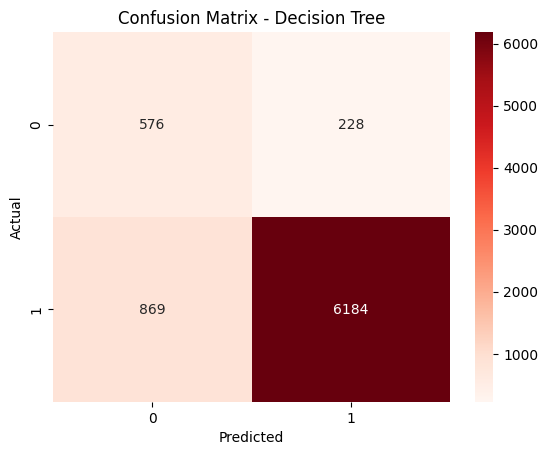

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 모델 정의
dt_model = DecisionTreeClassifier(
    max_depth=5,
    class_weight='balanced',
    random_state=42
)
# 학습
dt_model.fit(X_res, y_res)

# 예측
y_pred_dt = dt_model.predict(X_test_encoded)

# 평가
print("[Decision Tree 결과]")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.3f}")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **트리 시각화**
**1. 루트 노드**
- 전체 32912건 데이터
- Unknown 아닌 타겟은 왼쪽, Unknown이면 오른쪽
- 클래스가 정확히 반반으로 나뉘어 있음 (gini = 0.5 → 혼합도 최대)

**2. 왼쪽 하위 분기**
- Assassination 공격이 아닌 경우 왼쪽으로 → 성공률 높음
- 왼쪽으로 갈수록 성공(class = Success) 쏠림 증가

**3. 리프 노드**
- 더 이상 분기 없음 (리프 노드)
- 1141건 중 1112건이 실패 → 이 조건에서는 실패 확률 매우 높음

**4. 색상**
- 파란색: class = Success (양성 클래스, 1)
- 주황색: class = Fail (음성 클래스, 0)
- 진할수록 순수함 (예: value가 한쪽에 몰려 있음)

**5. 해석**
- 조건 경로를 따라가면서 해석하면,
- 만약 타겟이 Unknown이 아니고, 공격 유형이 Assassination이 아니며, 무기가 Explosives이고, 타겟이 Government이며, <br>
지역이 특정 provstate라면 <br>
→ 테러는 실패할 확률이 높음.

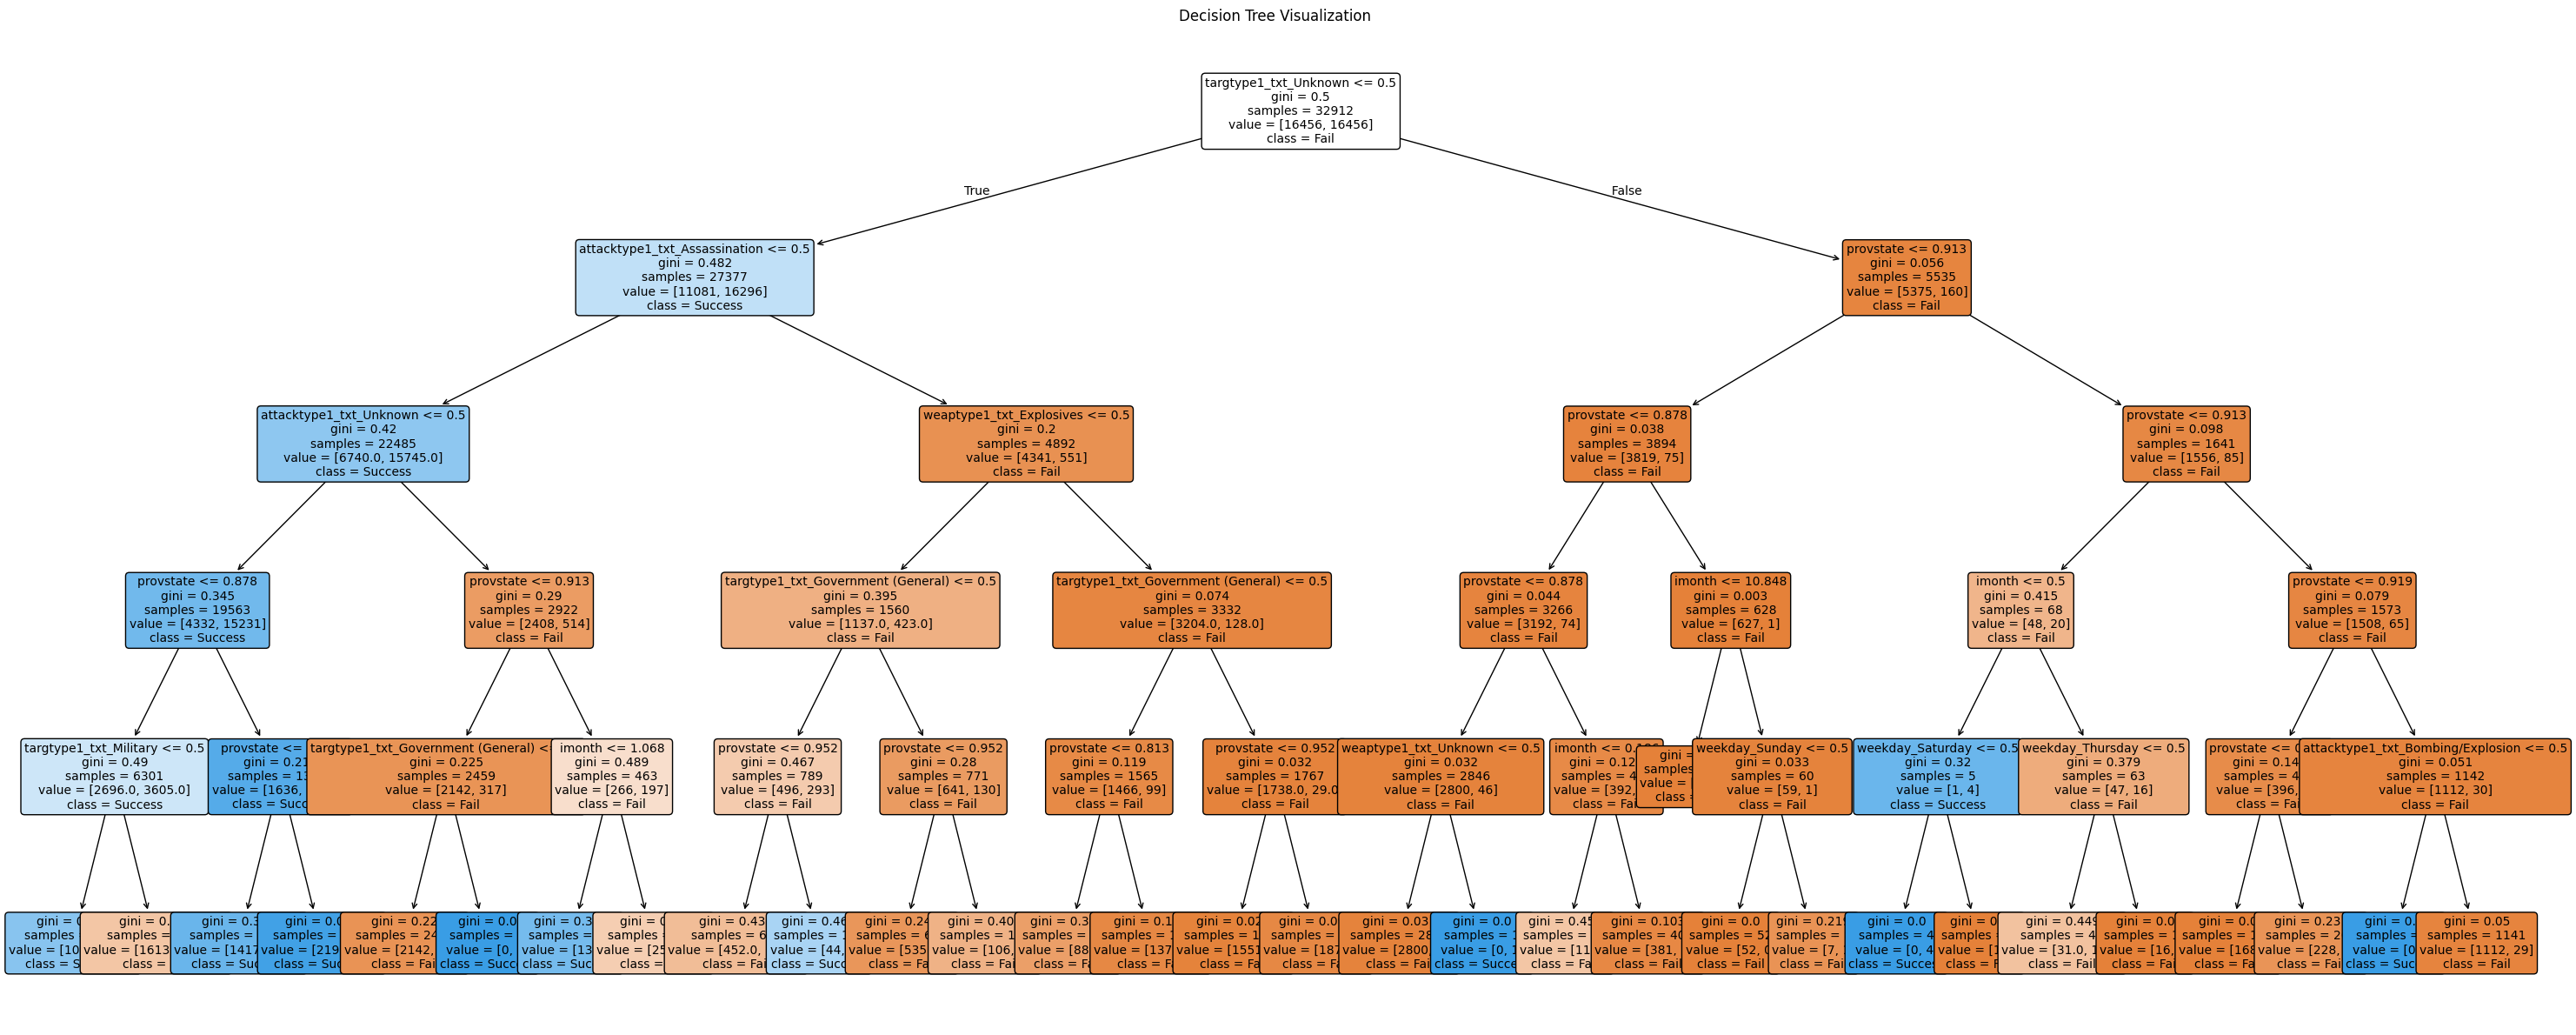

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 트리 시각화
plt.figure(figsize=(30, 12))
plot_tree(
    dt_model,
    feature_names=X_res.columns,
    class_names=['Fail', 'Success'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.tight_layout()
plt.show()

### **과적합 판단**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# 훈련 데이터 예측
y_train_pred_dt = dt_model.predict(X_res)

# 훈련 성능
train_acc = accuracy_score(y_res, y_train_pred_dt)
train_f1 = f1_score(y_res, y_train_pred_dt)

# 테스트 성능
test_acc = accuracy_score(y_test, y_pred_dt)
test_f1 = f1_score(y_test, y_pred_dt)

# 출력
print(f"Train Accuracy: {train_acc:.3f}, F1: {train_f1:.3f}")
print(f"Test  Accuracy: {test_acc:.3f}, F1: {test_f1:.3f}")

# 과적합 판단
gap = train_acc - test_acc
print(f"\n📍 Accuracy Gap: {gap:.3f}")
if gap > 0.1:
    print("과적합 가능성 높음")
else:
    print("과적합 심하지 않음")


Train Accuracy: 0.856, F1: 0.859
Test  Accuracy: 0.860, F1: 0.919

📍 Accuracy Gap: -0.005
과적합 심하지 않음


## **인코딩+SMOTE(오버샘플링)+SVM**

In [ ]:
# 피처+타겟
features = ['weaptype1_txt', 'attacktype1_txt', 'targtype1_txt', 'weekday', 'imonth', 'provstate']
target = 'success'

X = iraq_df[features].copy()
y = iraq_df[target]

In [ ]:
X.value_counts()
y.value_counts()

,count
success,
1,23509
0,2681


In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [ ]:
# 각 인코딩 대상 그룹 지정
onehot_cols = ['weaptype1_txt', 'attacktype1_txt', 'targtype1_txt', 'weekday']
ordinal_cols = ['imonth']
target_cols = ['provstate']

# One-Hot Encoding
X_train_onehot = pd.get_dummies(X_train[onehot_cols], drop_first=True)

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder()
X_train_ordinal = pd.DataFrame(
    ordinal_encoder.fit_transform(X_train[ordinal_cols]),
    columns=ordinal_cols,
    index=X_train.index
)

# Target Encoding (분할 후 적용)
target_encoder = TargetEncoder()
X_train_target = target_encoder.fit_transform(X_train[target_cols], y_train)

# 인코딩 합치기
X_train_encoded = pd.concat([X_train_onehot, X_train_ordinal, X_train_target], axis=1)

In [ ]:
# SMOTE 오버샘플링
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_encoded, y_train)

In [ ]:
# 클래스 분포 확인
print(y_res.value_counts())

success
1    16456
0    16456
Name: count, dtype: int64


### **SVM (Support Vector Machine)**

[SVM 결과]
Accuracy: 0.872
              precision    recall  f1-score   support

           0       0.42      0.68      0.52       804
           1       0.96      0.89      0.93      7053

    accuracy                           0.87      7857
   macro avg       0.69      0.79      0.72      7857
weighted avg       0.91      0.87      0.88      7857



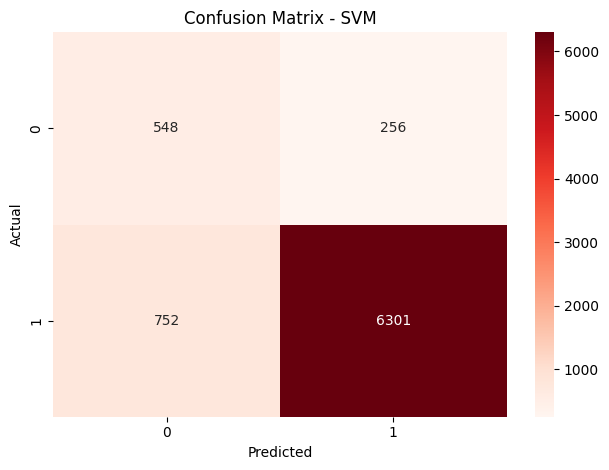

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# 선형 SVM 정의
svm_model = LinearSVC(class_weight='balanced', max_iter=10000, random_state=42)

# 학습
svm_model.fit(X_res, y_res)

# 예측
y_pred_svm = svm_model.predict(X_test_encoded)

# 평가
print("[SVM 결과]")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

### **과적합 판단**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# 훈련 데이터 예측
y_train_pred_svm = svm_model.predict(X_res)

# 훈련 성능
train_acc = accuracy_score(y_res, y_train_pred_svm)
train_f1 = f1_score(y_res, y_train_pred_svm)

# 테스트 성능
test_acc = accuracy_score(y_test, y_pred_svm)
test_f1 = f1_score(y_test, y_pred_svm)

# 출력
print(f"Train Accuracy: {train_acc:.3f}, F1: {train_f1:.3f}")
print(f"Test  Accuracy: {test_acc:.3f}, F1: {test_f1:.3f}")

# 과적합 판단
gap = train_acc - test_acc
print(f"\n📍 Accuracy Gap: {gap:.3f}")
if gap > 0.1:
    print("과적합 가능성 높음")
else:
    print("과적합 심하지 않음")


Train Accuracy: 0.867, F1: 0.871
Test  Accuracy: 0.872, F1: 0.926

📍 Accuracy Gap: -0.005
과적합 심하지 않음


## **인코딩+SMOTE(오버샘플링)+MLP**

In [ ]:
# 피처+타겟
features = ['weaptype1_txt', 'attacktype1_txt', 'targtype1_txt', 'weekday', 'imonth', 'provstate']
target = 'success'

X = iraq_df[features].copy()
y = iraq_df[target]

In [ ]:
X.value_counts()
y.value_counts()

,count
success,
1,23509
0,2681


In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [ ]:
# 각 인코딩 대상 그룹 지정
onehot_cols = ['weaptype1_txt', 'attacktype1_txt', 'targtype1_txt', 'weekday']
ordinal_cols = ['imonth']
target_cols = ['provstate']

# One-Hot Encoding
X_train_onehot = pd.get_dummies(X_train[onehot_cols], drop_first=True)

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder()
X_train_ordinal = pd.DataFrame(
    ordinal_encoder.fit_transform(X_train[ordinal_cols]),
    columns=ordinal_cols,
    index=X_train.index
)

# Target Encoding (분할 후 적용)
target_encoder = TargetEncoder()
X_train_target = target_encoder.fit_transform(X_train[target_cols], y_train)

# 인코딩 합치기
X_train_encoded = pd.concat([X_train_onehot, X_train_ordinal, X_train_target], axis=1)

In [ ]:
# SMOTE 오버샘플링
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_encoded, y_train)

In [ ]:
# 클래스 분포 확인
print(y_res.value_counts())

success
1    16456
0    16456
Name: count, dtype: int64


### **MLP (Multi-layer Perceptron)**



📌 [MLP 결과]
Accuracy: 0.863
              precision    recall  f1-score   support

           0       0.40      0.65      0.49       804
           1       0.96      0.89      0.92      7053

    accuracy                           0.86      7857
   macro avg       0.68      0.77      0.71      7857
weighted avg       0.90      0.86      0.88      7857



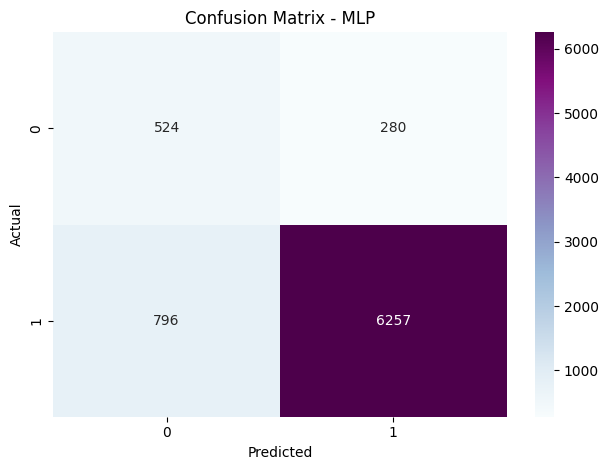

In [ ]:
from sklearn.neural_network import MLPClassifier

# 모델 정의
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),   # 기본 1층, 100개 뉴런
    max_iter=300,
    random_state=42
)

# 학습
mlp_model.fit(X_res, y_res)

# 예측
y_pred_mlp = mlp_model.predict(X_test_encoded)

# 평가
print("📌 [MLP 결과]")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.3f}")
print(classification_report(y_test, y_pred_mlp))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu')
plt.title("Confusion Matrix - MLP")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


### **과적합 판단**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# 훈련 데이터 예측
y_train_pred_mlp = mlp_model.predict(X_res)

# 훈련 성능
train_acc = accuracy_score(y_res, y_train_pred_mlp)
train_f1 = f1_score(y_res, y_train_pred_mlp)

# 테스트 성능
test_acc = accuracy_score(y_test, y_pred_mlp)
test_f1 = f1_score(y_test, y_pred_mlp)

# 출력
print(f"Train Accuracy: {train_acc:.3f}, F1: {train_f1:.3f}")
print(f"Test  Accuracy: {test_acc:.3f}, F1: {test_f1:.3f}")

# 과적합 판단
gap = train_acc - test_acc
print(f"\n📍 Accuracy Gap: {gap:.3f}")
if gap > 0.1:
    print("과적합 가능성 높음")
else:
    print("과적합 심하지 않음")


Train Accuracy: 0.900, F1: 0.899
Test  Accuracy: 0.863, F1: 0.921

📍 Accuracy Gap: 0.036
과적합 심하지 않음


## **인코딩+SMOTE(오버샘플링)+KNN**

In [ ]:
# 피처+타겟
features = ['weaptype1_txt', 'attacktype1_txt', 'targtype1_txt', 'weekday', 'imonth', 'provstate']
target = 'success'

X = iraq_df[features].copy()
y = iraq_df[target]

In [ ]:
X.value_counts()
y.value_counts()

,count
success,
1,23509
0,2681


In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [ ]:
# 각 인코딩 대상 그룹 지정
onehot_cols = ['weaptype1_txt', 'attacktype1_txt', 'targtype1_txt', 'weekday']
ordinal_cols = ['imonth']
target_cols = ['provstate']

# One-Hot Encoding
X_train_onehot = pd.get_dummies(X_train[onehot_cols], drop_first=True)

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder()
X_train_ordinal = pd.DataFrame(
    ordinal_encoder.fit_transform(X_train[ordinal_cols]),
    columns=ordinal_cols,
    index=X_train.index
)

# Target Encoding (분할 후 적용)
target_encoder = TargetEncoder()
X_train_target = target_encoder.fit_transform(X_train[target_cols], y_train)

# 인코딩 합치기
X_train_encoded = pd.concat([X_train_onehot, X_train_ordinal, X_train_target], axis=1)

In [ ]:
# SMOTE 오버샘플링
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_encoded, y_train)

In [ ]:
# 클래스 분포 확인
print(y_res.value_counts())

success
1    16456
0    16456
Name: count, dtype: int64


### **KNN (KNeighborsClassifier)**






[KNN 결과]
Accuracy: 0.892
              precision    recall  f1-score   support

           0       0.48      0.58      0.52       804
           1       0.95      0.93      0.94      7053

    accuracy                           0.89      7857
   macro avg       0.71      0.75      0.73      7857
weighted avg       0.90      0.89      0.90      7857



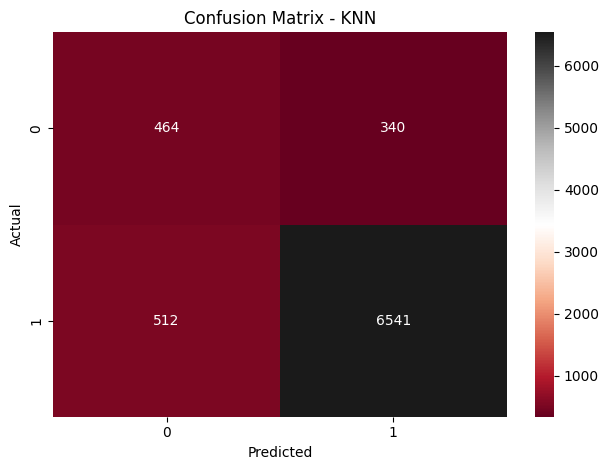

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 모델 정의
knn_model = KNeighborsClassifier(n_neighbors=5)

# 학습
knn_model.fit(X_res, y_res)

# 예측
y_pred_knn = knn_model.predict(X_test_encoded)
y_prob_knn = knn_model.predict_proba(X_test_encoded)[:, 1]

# 평가 출력
print("[KNN 결과]")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.3f}")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='RdGy')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


### **과적합 판단**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# 훈련 데이터 예측
y_train_pred_knn = knn_model.predict(X_res)

# 훈련 성능
train_acc = accuracy_score(y_res, y_train_pred_knn)
train_f1 = f1_score(y_res, y_train_pred_knn)

# 테스트 성능
test_acc = accuracy_score(y_test, y_pred_knn)
test_f1 = f1_score(y_test, y_pred_knn)

# 출력
print(f"Train Accuracy: {train_acc:.3f}, F1: {train_f1:.3f}")
print(f"Test  Accuracy: {test_acc:.3f}, F1: {test_f1:.3f}")

# 과적합 판단
gap = train_acc - test_acc
print(f"\n📍 Accuracy Gap: {gap:.3f}")
if gap > 0.1:
    print("과적합 가능성 높음")
else:
    print("과적합 심하지 않음")


Train Accuracy: 0.933, F1: 0.935
Test  Accuracy: 0.892, F1: 0.939

📍 Accuracy Gap: 0.042
과적합 심하지 않음


## **앙상블 (VotingClassifier)**

In [ ]:
from sklearn.ensemble import VotingClassifier

# 앙상블에 사용할 모델 정의
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lgbm', lgbm_model),
        ('lr', lr_model),
        ('mlp', mlp_model),
        ('knn', knn_model)
    ],
    voting='soft'  # soft: 확률 평균 / hard: 다수결
)

# 학습
voting_clf.fit(X_res, y_res)

# 예측
y_pred_voting = voting_clf.predict(X_test_encoded)
y_prob_voting = voting_clf.predict_proba(X_test_encoded)[:, 1]

# 평가
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, recall_score

print("[Voting 앙상블 결과]")
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting):.3f}")
print(classification_report(y_test, y_pred_voting))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Number of positive: 16456, number of negative: 16456
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 32912, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_

## **앙상블 (StackingClassifier)**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lgbm', lgbm_model),
        ('lr', lr_model),
        ('mlp', mlp_model),
        ('knn', knn_model)
    ],
    final_estimator=LogisticRegression(class_weight='balanced', max_iter=1000),
    cv=5
)

# 학습
stacking_clf.fit(X_res, y_res)

# 예측
y_pred_stack = stacking_clf.predict(X_test_encoded)
y_prob_stack = stacking_clf.predict_proba(X_test_encoded)[:, 1]

# 평가
print("[Stacking 앙상블 결과]")
print(f"Accuracy: {accuracy_score(y_test, y_pred_stack):.3f}")
print(classification_report(y_test, y_pred_stack))

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Number of positive: 16456, number of negative: 16456
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 32912, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Found whitespace in feature_names, re

## **모델 성능 비교**

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

# 예측 확률 (ROC-AUC용, 확률 출력 불가한 모델은 decision_function 또는 None 처리)
y_prob_rf = rf_model.predict_proba(X_test_encoded)[:, 1]
y_prob_xgb = xgb_model.predict_proba(X_test_encoded)[:, 1]
y_prob_lr = lr_model.predict_proba(X_test_encoded)[:, 1]
y_prob_lgbm = lgbm_model.predict_proba(X_test_encoded)[:, 1]
y_prob_dt = dt_model.predict_proba(X_test_encoded)[:, 1]
y_prob_mlp = mlp_model.predict_proba(X_test_encoded)[:, 1]
y_prob_stack = stacking_clf.predict_proba(X_test_encoded)[:, 1]

# DT, SVM, MLP 모델 예측
y_pred_rf = rf_model.predict(X_test_encoded)
y_pred_dt = dt_model.predict(X_test_encoded)
y_pred_svm = svm_model.predict(X_test_encoded)
y_pred_mlp = mlp_model.predict(X_test_encoded)
y_pred_stack = stacking_clf.predict(X_test_encoded)

# 일부 모델은 predict_proba 미지원
# SVM은 decision_function 사용 → 확률 아님 주의 (정규화 없이도 AUC 가능)
from sklearn.preprocessing import MinMaxScaler
y_prob_svm_raw = svm_model.decision_function(X_test_encoded)
y_prob_svm = MinMaxScaler().fit_transform(y_prob_svm_raw.reshape(-1, 1)).flatten()


# 평가 함수
def get_scores(name, y_true, y_pred, y_prob):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_prob)
    }

# 결과 리스트에 추가
results = []
results.append(get_scores("Random Forest", y_test, y_pred_rf, y_prob_rf))
results.append(get_scores("XGBoost", y_test, y_pred_xgb, y_prob_xgb))
results.append(get_scores("Logistic Regression", y_test, y_pred_lr, y_prob_lr))
results.append(get_scores("LightGBM", y_test, y_pred_lgbm, y_prob_lgbm))
results.append(get_scores("Decision Tree", y_test, y_pred_dt, y_prob_dt))
results.append(get_scores("SVM", y_test, y_pred_svm, y_prob_svm))
results.append(get_scores("MLP", y_test, y_pred_mlp, y_prob_mlp))
results.append(get_scores("KNN", y_test, y_pred_knn, y_prob_knn))
results.append(get_scores("Voting", y_test, y_pred_voting, y_prob_voting))
results.append(get_scores("Stacking", y_test, y_pred_stack, y_prob_stack))

# 데이터프레임 변환
results_df = pd.DataFrame(results).set_index("Model")
display(results_df)


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


,Accuracy,Recall,F1,ROC-AUC
Model,,,,
Random Forest,0.901235,0.942719,0.944863,0.832637
XGBoost,0.908489,0.950376,0.949097,0.860549
Logistic Regression,0.868143,0.889409,0.923723,0.847234
LightGBM,0.912435,0.951085,0.951220,0.868479
Decision Tree,0.860379,0.876790,0.918530,0.851139
SVM,0.871707,0.893379,0.925937,0.849585
MLP,0.863052,0.887140,0.920824,0.832535
KNN,0.891562,0.927407,0.938855,0.804311
Voting,0.909507,0.944563,0.949341,0.860380


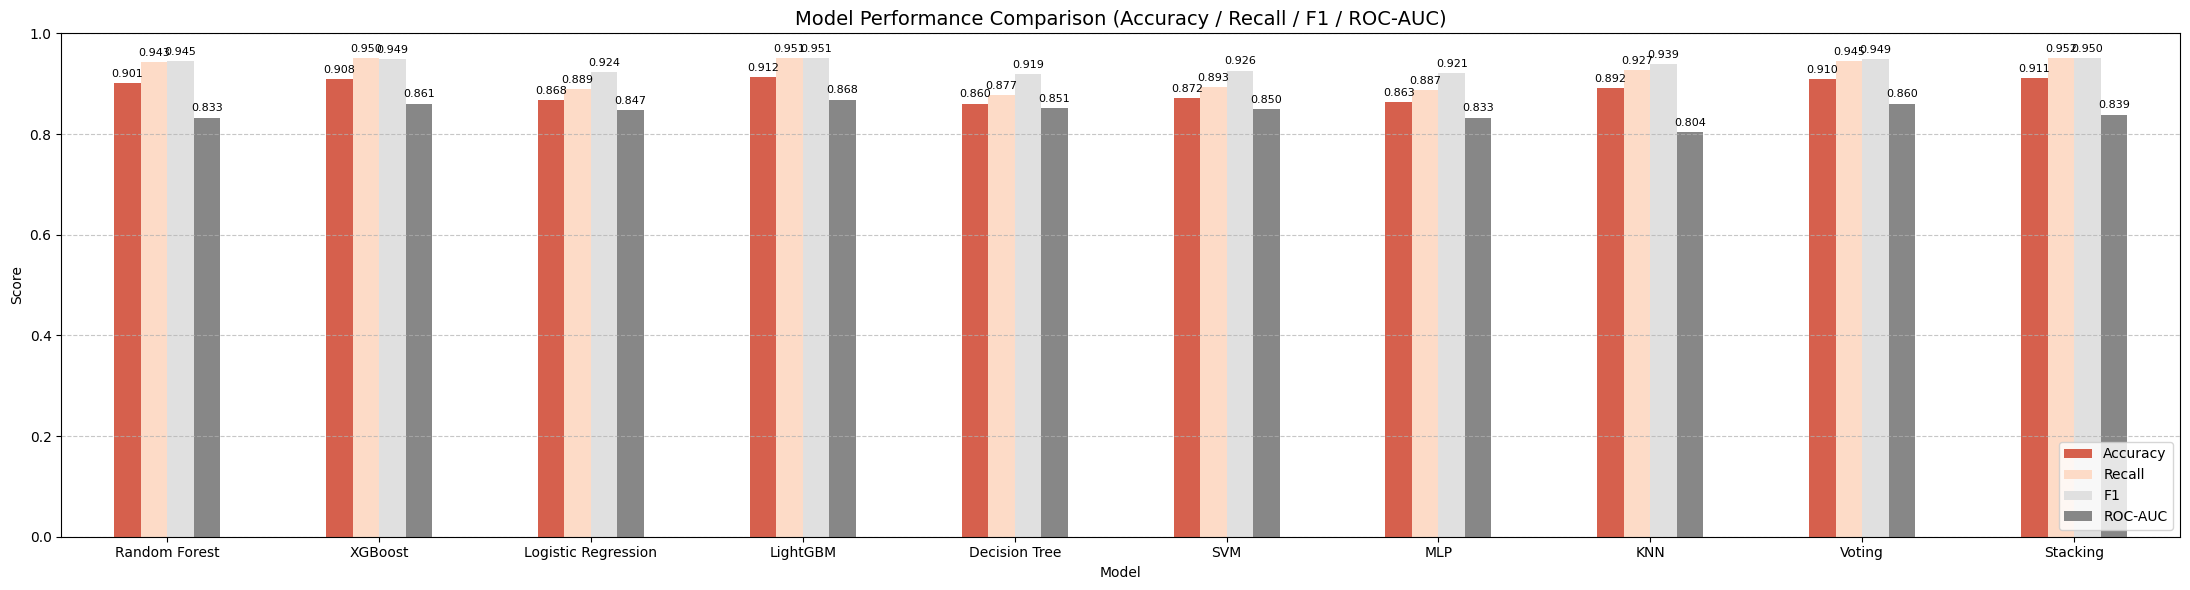

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 레드 계열 색상 팔레트
palette = sns.color_palette("RdGy", n_colors=len(results_df.columns))

# 막대그래프 그리기
ax = results_df.plot(
    kind='bar',
    figsize=(22, 6),
    ylim=(0, 1),
    rot=0,
    color=palette
)

plt.title("Model Performance Comparison (Accuracy / Recall / F1 / ROC-AUC)", fontsize=14)
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()

# 수치 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', fontsize=8, padding=3)

plt.show()


### 해석
1. f1-score
- 성공을 놓치지 않게 하는 것이 중요할 때 → Recall (0 클래스)
- 오탐(실패인데 성공으로 예측)을 줄이고 싶을 때 중요 → Precision (1 클래스)
- Precision과 Recall 모두 중요 → F1-score

2. 가장 f1-score가 높은 모델
lightGBM

### **정확도, 0(실패) f1, 1(성공) f1 비교**

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 각 모델에 대해 평가 결과 저장
def get_core_scores(name, y_true, y_pred):
    f1_per_class = f1_score(y_true, y_pred, average=None, labels=[0, 1])
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "F1 (Fail)": f1_per_class[0],
        "F1 (Success)": f1_per_class[1]
    }

# 모든 모델에 대해 결과 정리
core_results = []
core_results.append(get_core_scores("Random Forest", y_test, y_pred_rf))
core_results.append(get_core_scores("XGBoost", y_test, y_pred_xgb))
core_results.append(get_core_scores("Logistic Regression", y_test, y_pred_lr))
core_results.append(get_core_scores("LightGBM", y_test, y_pred_lgbm))
core_results.append(get_core_scores("Decision Tree", y_test, y_pred_dt))
core_results.append(get_core_scores("SVM", y_test, y_pred_svm))
core_results.append(get_core_scores("MLP", y_test, y_pred_mlp))
core_results.append(get_core_scores("KNN", y_test, y_pred_knn))
core_results.append(get_core_scores("Voting", y_test, y_pred_voting))
core_results.append(get_core_scores("Stacking", y_test, y_pred_stack))

# 데이터프레임화
core_df = pd.DataFrame(core_results).set_index("Model")
display(core_df)


,Accuracy,F1 (Fail),F1 (Success)
Model,,,
Random Forest,0.901235,0.526829,0.944863
XGBoost,0.908489,0.547514,0.949097
Logistic Regression,0.868143,0.514071,0.923723
LightGBM,0.912435,0.572671,0.951220
Decision Tree,0.860379,0.512228,0.918530
SVM,0.871707,0.520913,0.925937
MLP,0.863052,0.493409,0.920824
KNN,0.891562,0.521348,0.938855
Voting,0.909507,0.576534,0.949341


<Figure size 2000x600 with 0 Axes>

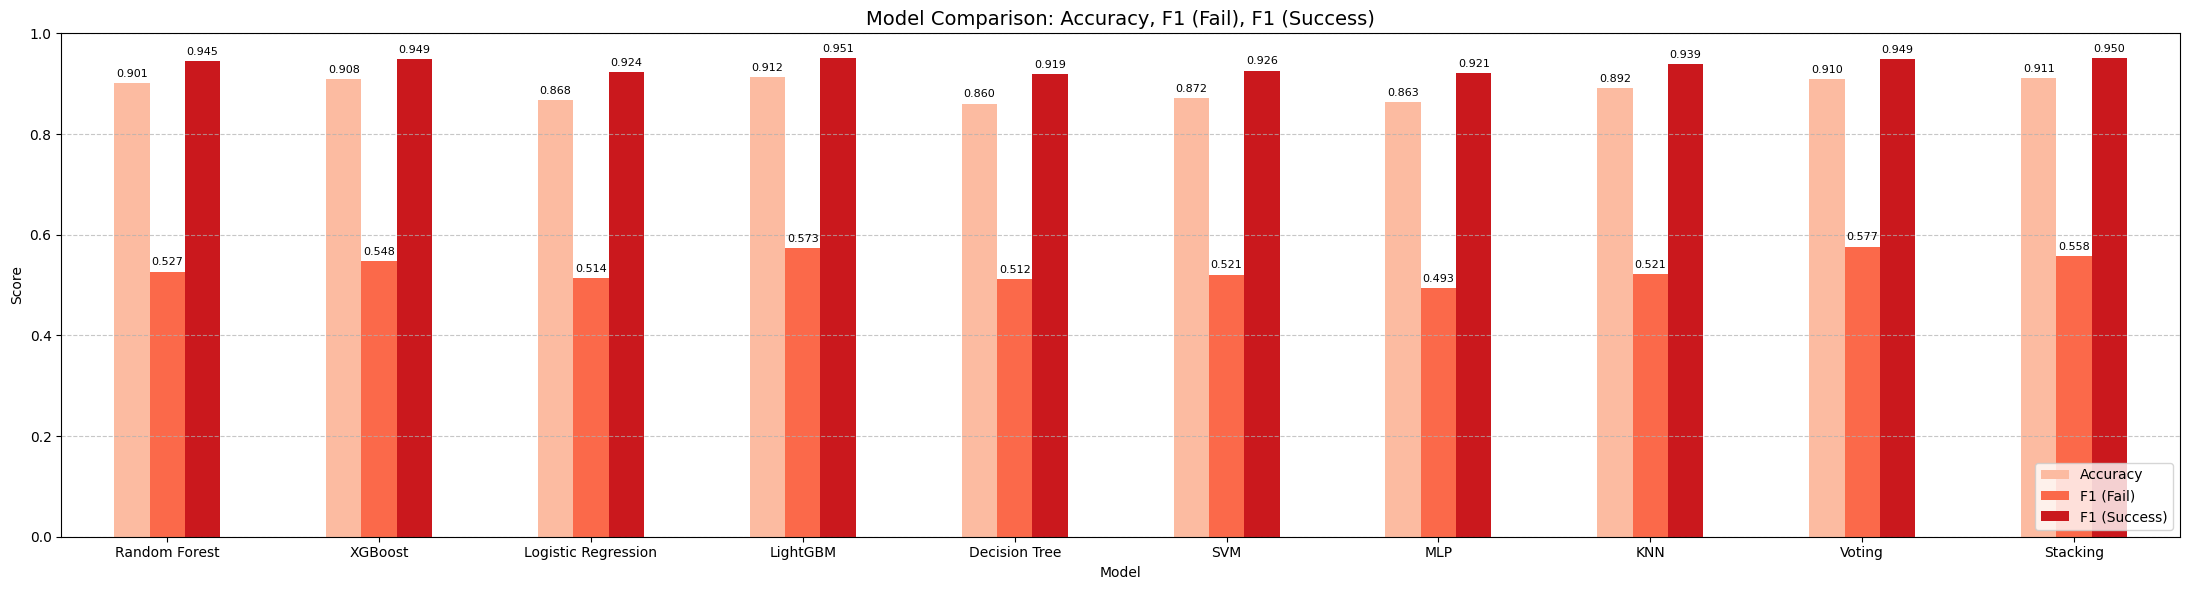

In [ ]:
# 시각화
plt.figure(figsize=(20, 6))
palette = sns.color_palette("Reds", n_colors=3)

ax = core_df.plot(
    kind='bar',
    figsize=(22, 6),
    ylim=(0, 1),
    rot=0,
    color=palette
)

plt.title("Model Comparison: Accuracy, F1 (Fail), F1 (Success)", fontsize=14)
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()

# 수치 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', fontsize=8, padding=3)

plt.show()
